# Churn Rate Visual Exploration and Trends

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

## Load Data

In [2]:
# Load data
df = pd.read_csv('data/data_with_churn.csv')
# show column names
df.columns.tolist()

['contract_item_description',
 'contract_item_internal_id',
 'contract_item_product_category',
 'contract_item_product_description',
 'contract_item_support_end_date',
 'contract_item_support_start_date',
 'contract_item_concurrent_sessions',
 'description',
 'end_date_time',
 'start_date_time',
 'item_count',
 'customer_earliest_start',
 'customer_latest_end',
 'sla',
 'product_category',
 'service_level_regex',
 'otrs_version',
 'system_type',
 'feature_add_ons',
 'cancellation_date',
 'customer_country',
 'concat_volume',
 'concat_currency',
 'cancellation_date_orca',
 'end_customer_id',
 'churn']

## Distribution

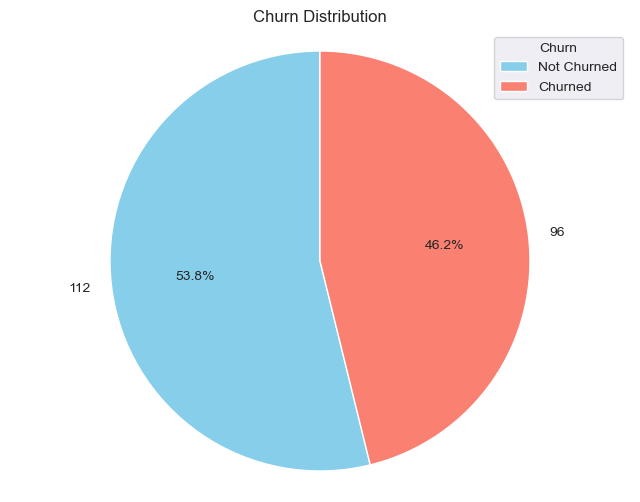

In [3]:
# Plot: Pie chart or bar plot of churn (churn column)
churn_counts = df['churn'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.axis('equal')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

## Correlation


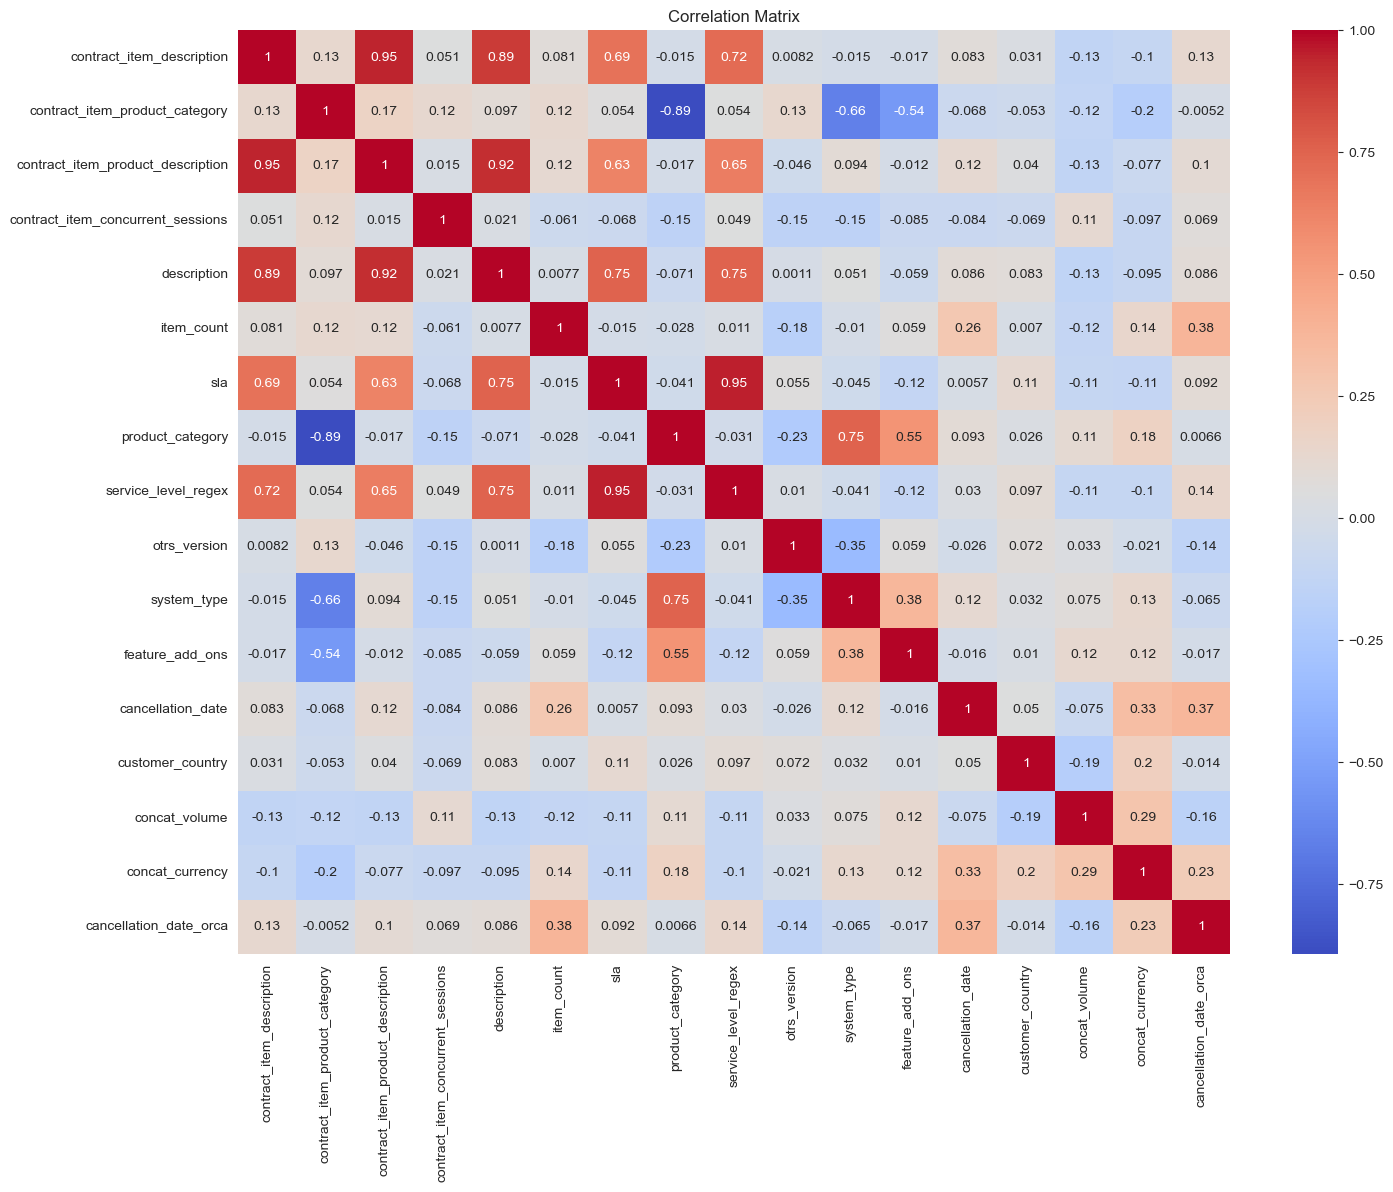

In [4]:
# Convert all object-type columns to numeric using label encoding
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Drop datetime and category columns
df_encoded = df_encoded.select_dtypes(exclude=['datetime64[ns]', 'category'])

# drop specific columns
df_encoded = df_encoded.drop(columns=['end_customer_id', 'contract_item_internal_id', 'churn'])
# drop columns with time
df_encoded = df_encoded.drop(
    columns=['start_date_time', 'end_date_time', 'contract_item_support_start_date', 'contract_item_support_end_date',
             'customer_earliest_start', 'customer_latest_end'])

# Calculate and plot correlation matrix
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

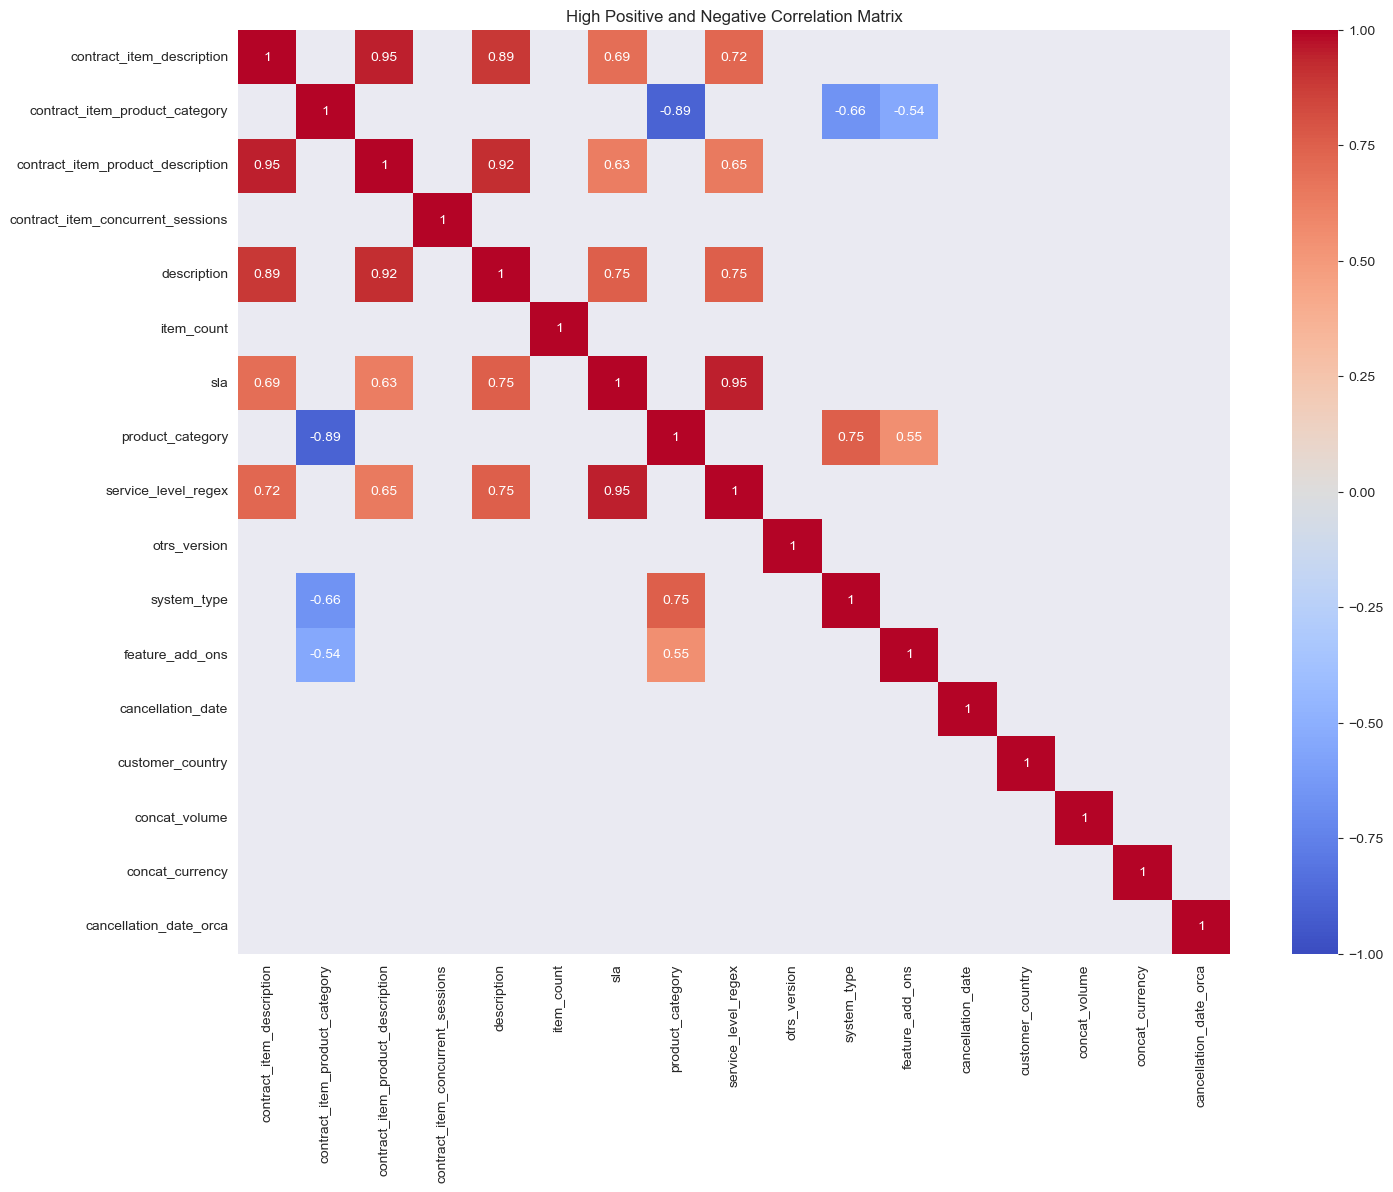

In [5]:
# Select and plot all the columns with high Correlation
# Select columns with correlation greater than 0.5 and less than 1.0, and also with correlation less than -0.5 and greater than -1.0

# Create a mask for correlations that are not within the desired range
mask = (correlation_matrix >= -0.5) & (correlation_matrix <= 0.5)
filtered_corr = correlation_matrix.mask(mask)  # Set masked values to NaN

# Plot the combined heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=np.isnan(filtered_corr))
plt.title('High Positive and Negative Correlation Matrix')
plt.grid(False)
plt.show()


## Box Plots

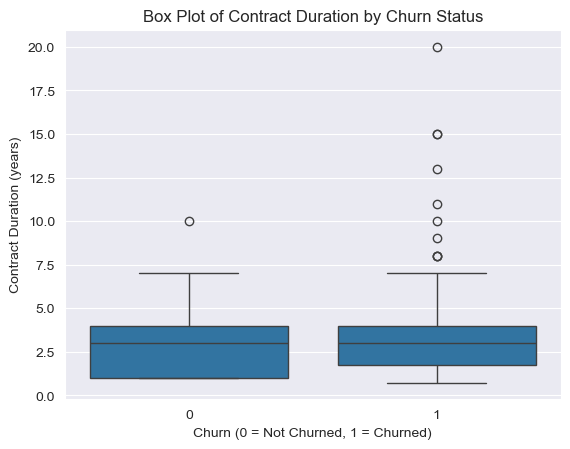

In [6]:
# Box plot grouped by churn status for a numerical column, e.g., 'contract_duration'
contract_duration = pd.to_datetime(df['end_date_time']) - pd.to_datetime(df['start_date_time'])
sns.boxplot(data=df, x='churn', y=contract_duration.dt.days / 365)
plt.title('Box Plot of Contract Duration by Churn Status')
plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
plt.ylabel('Contract Duration (years)')
plt.show()

* Central Tendency: The median contract duration for both churned and non-churned groups appears similar, indicating that the middle contract durations for both groups do not differ significantly.

* Spread/Variability: The distribution for churned customers shows a slightly wider spread in contract duration compared to non-churned customers. This suggests more variability among churned customers.

* Outliers: There are more extreme outliers in the churned group, indicating some customers have notably longer contract durations. These outliers might be worth further investigation to understand their impact on churn behavior.

* Potential Implications: The similarity in medians might indicate that, on average, contract duration alone does not strongly differentiate churned vs. non-churned customers. However, the higher variability and outliers among churned customers may point to segments that exhibit different behaviors.

## Bar Plots

### Columns with High Positive Correlation

**Service Level Regex**

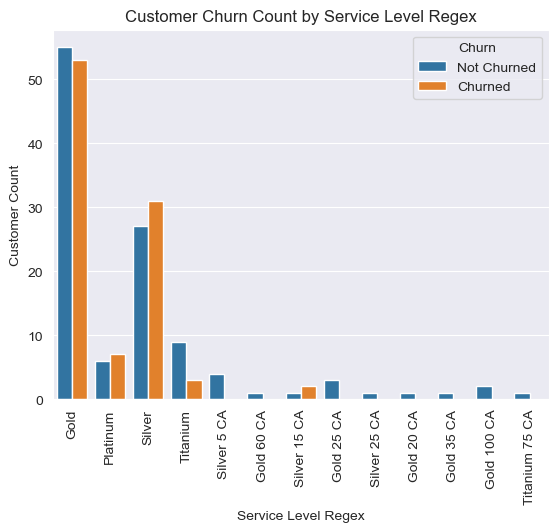

In [7]:
# count plot grouped by 'service_level_regex' and churn status
plt.size = (16, 6)
sns.countplot(data=df, x='service_level_regex', hue='churn')
plt.title('Customer Churn Count by Service Level Regex')
plt.xlabel('Service Level Regex')
plt.ylabel('Customer Count')
plt.xticks(rotation=90)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

**SLA - Service level of the contract**

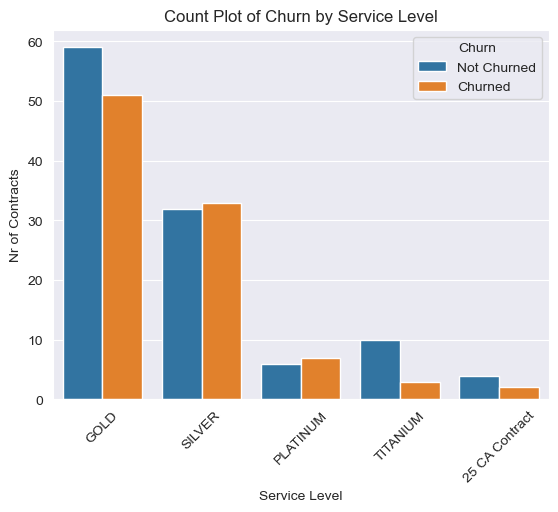

In [8]:
# count plot grouped by churn status for service level
# order the service levels as SILVER, GOLD, PLATINUM, and TITANIUM
service_level_order = df['sla'].value_counts().index

sns.countplot(data=df, x='sla', hue='churn', order=service_level_order)
plt.title('Count Plot of Churn by Service Level')
plt.xlabel('Service Level')
plt.ylabel('Nr of Contracts')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

**Contract Item Description**

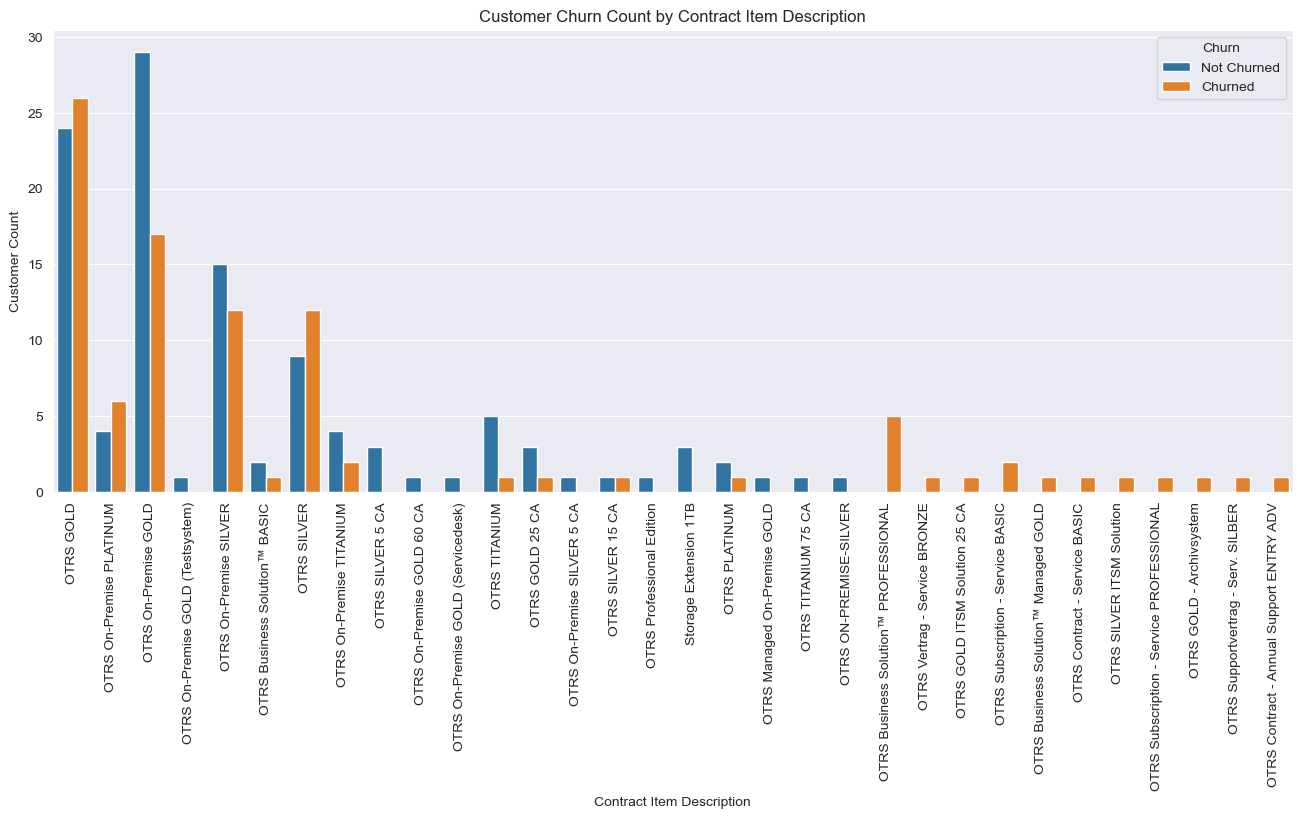

In [9]:
# count plot grouped by contract item description and churn status
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='contract_item_description', hue='churn')
plt.title('Customer Churn Count by Contract Item Description')
plt.xlabel('Contract Item Description')
plt.ylabel('Customer Count')
plt.xticks(rotation=90)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

**Contract Item Product Description**

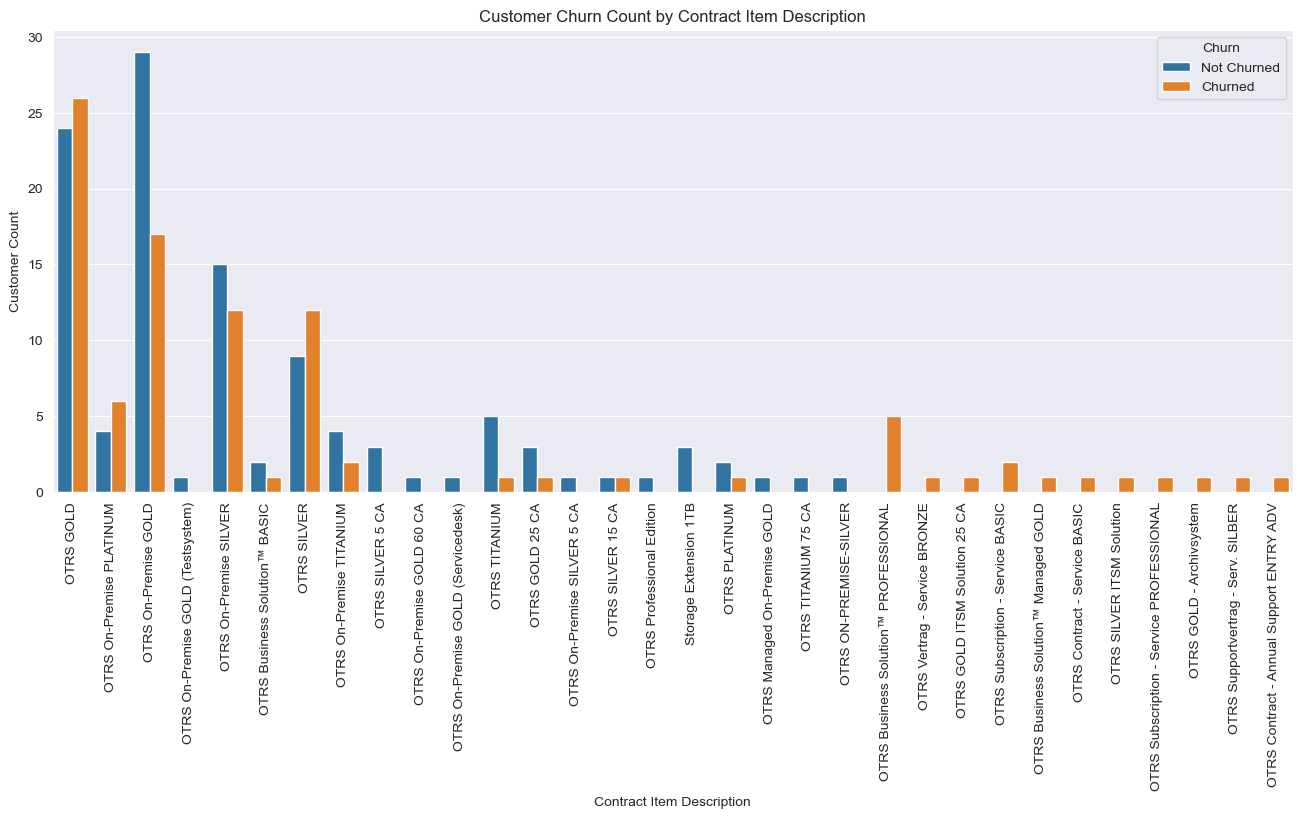

In [10]:
# count plot grouped by contract item product description and churn status
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='contract_item_description', hue='churn')
plt.title('Customer Churn Count by Contract Item Description')
plt.xlabel('Contract Item Description')
plt.ylabel('Customer Count')
plt.xticks(rotation=90)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

**Contract Description**

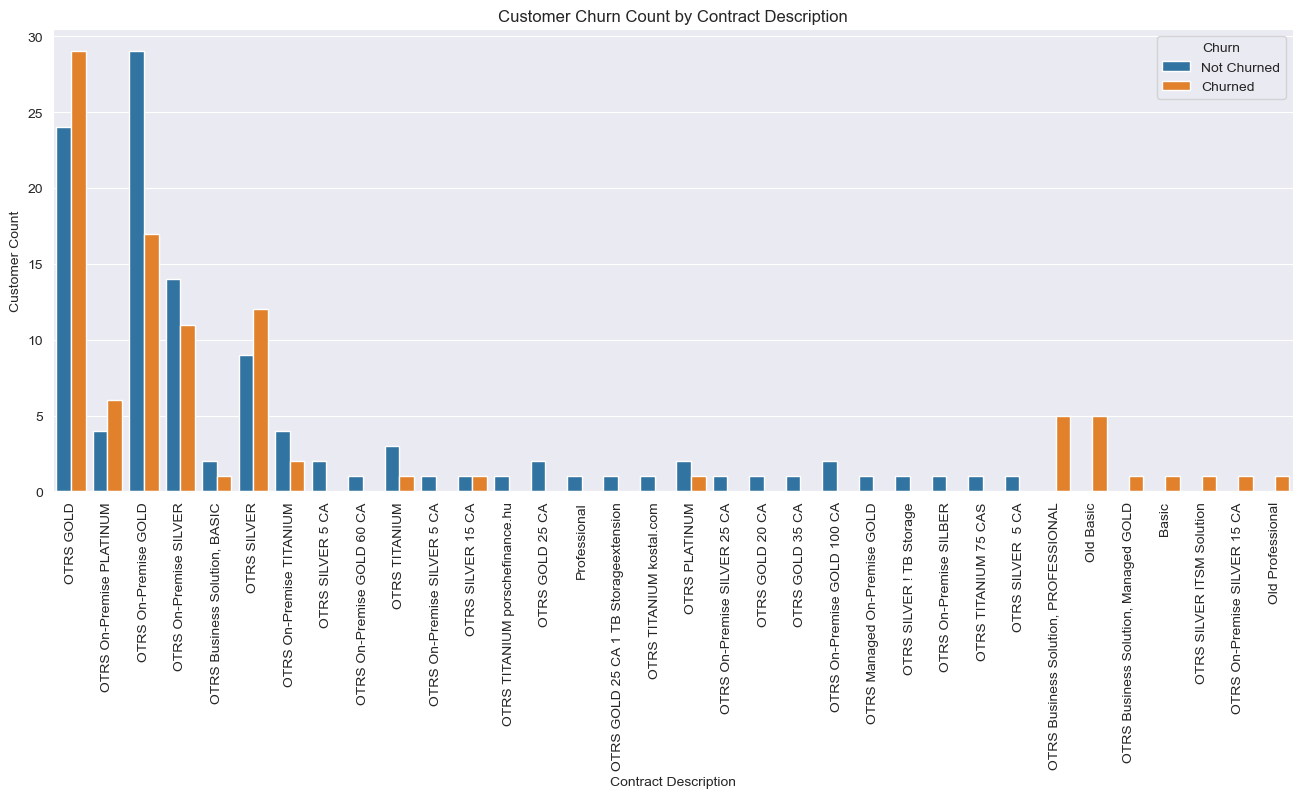

In [11]:
# count plot grouped by description and churn status
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='description', hue='churn')
plt.title('Customer Churn Count by Contract Description')
plt.xlabel('Contract Description')
plt.ylabel('Customer Count')
plt.xticks(rotation=90)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Columns with High Negative Correlation

**Contract Item Product Category**

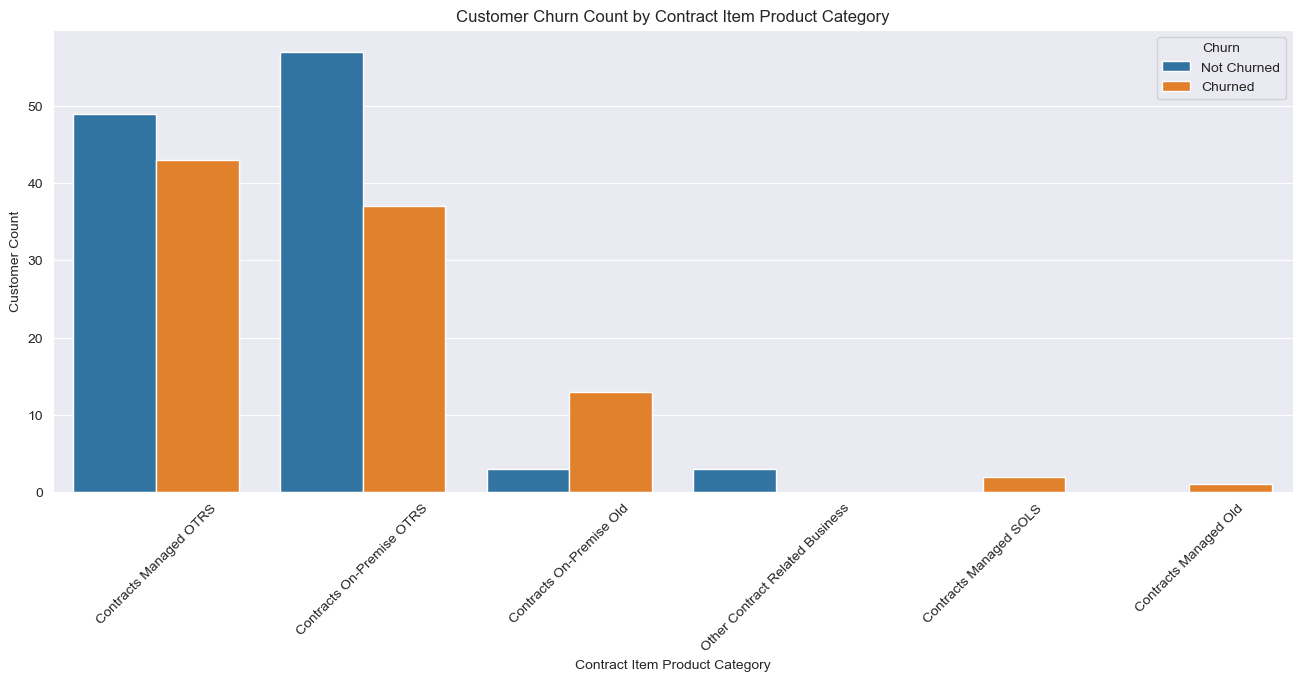

In [12]:
# count plot grouped by contract item product category and churn status
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='contract_item_product_category', hue='churn')
plt.title('Customer Churn Count by Contract Item Product Category')
plt.xlabel('Contract Item Product Category')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

**Contract Product Category**

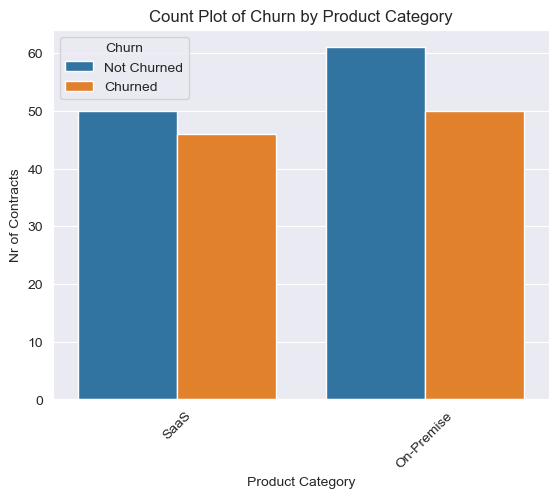

In [23]:
# product_category vs. churn
sns.countplot(data=df, x='product_category', hue='churn')
plt.title('Count Plot of Churn by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Nr of Contracts')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

In [25]:
# product_category vs. churn in percentage
df_product_category = df.groupby(['product_category', 'churn']).size().reset_index(name='count')
df_product_category_total = df_product_category.groupby('product_category')['count'].sum().reset_index(name='total')
df_product_category = df_product_category.merge(df_product_category_total, on='product_category')
df_product_category['percentage'] = df_product_category['count'] / df_product_category['total'] * 100
print(df_product_category)


  product_category  churn  count  total  percentage
0       On-Premise      0     61    111   54.954955
1       On-Premise      1     50    111   45.045045
2             SaaS      0     50     96   52.083333
3             SaaS      1     46     96   47.916667


**System Type**

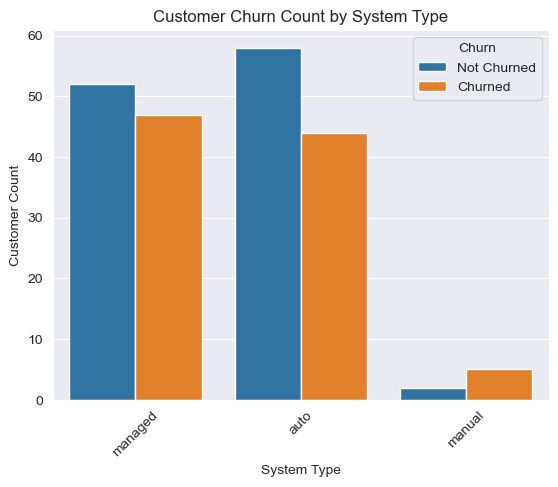

In [14]:
# count plot grouped by 'system_type' and churn status
sns.countplot(data=df, x='system_type', hue='churn')
plt.title('Customer Churn Count by System Type')
plt.xlabel('System Type')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

**Feature Add-Ons**

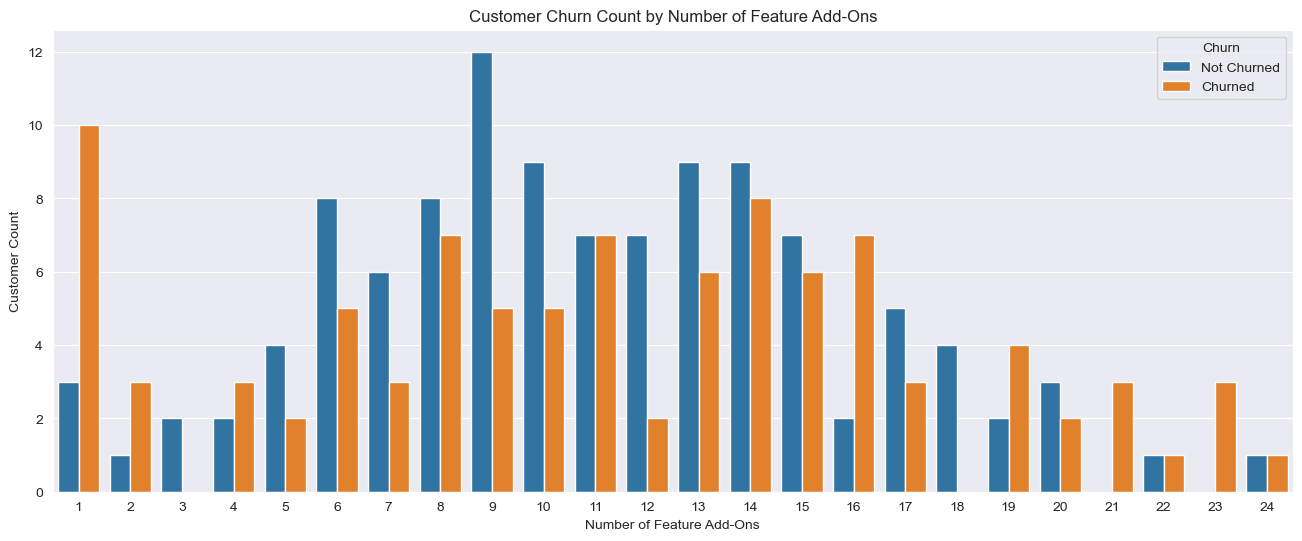

In [15]:
# count plot grouped by number of 'feature_add_ons' and churn status
# get the number of feature add-ons
df_feature_add_ons = pd.DataFrame({'feature_add_ons': df['feature_add_ons'], 'churn': df['churn']})
df_feature_add_ons['number_of_features'] = df['feature_add_ons'].str.split(',').str.len()

plt.figure(figsize=(16, 6))
sns.countplot(data=df_feature_add_ons, x='number_of_features', hue='churn')
plt.title('Customer Churn Count by Number of Feature Add-Ons')
plt.xlabel('Number of Feature Add-Ons')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Product Price

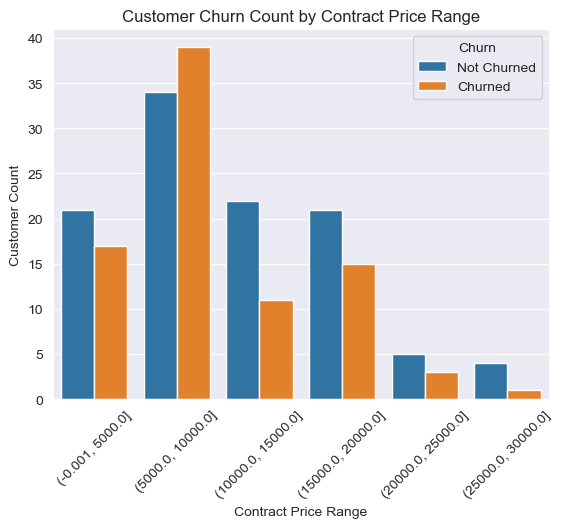

In [16]:
# Step 1: Create bins for contract price
df['contract_price_bin'] = pd.cut(
    df['concat_volume'],
    bins=[0, 5000, 10000, 15000, 20000, 25000, 30000],
    include_lowest=True
)

# Step 2: Plot count plot
sns.countplot(data=df, x='contract_price_bin', hue='churn')
plt.title('Customer Churn Count by Contract Price Range')
plt.xlabel('Contract Price Range')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

### Contract Duration

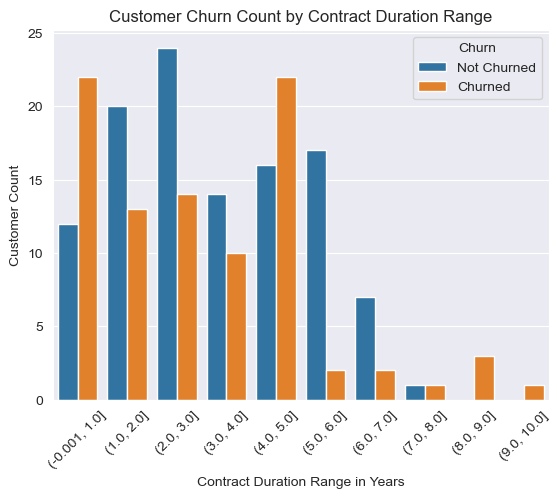

In [17]:
# count plot grouped by churn status for contract duration in years 
# Create contract_duration and contract_duration_bin columns
df['contract_duration'] = pd.to_datetime(df['end_date_time']) - pd.to_datetime(df['start_date_time'])
df['contract_duration'] = df['contract_duration'].dt.days / 365
df['contract_duration_bin'] = pd.cut(
    df['contract_duration'],
    bins=range(0, 11),
    include_lowest=True
)

sns.countplot(data=df, x='contract_duration_bin', hue='churn')
plt.title('Customer Churn Count by Contract Duration Range')
plt.xlabel('Contract Duration Range in Years')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

### Number of Subcontracts

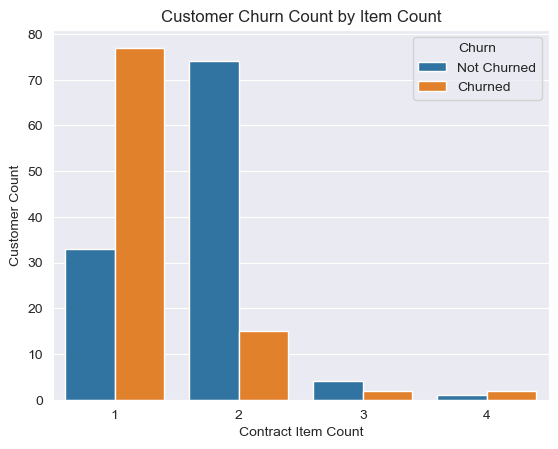

In [18]:
# count plot grouped by item count and churn status
sns.countplot(data=df, x='item_count', hue='churn')
plt.title('Customer Churn Count by Item Count')
plt.xlabel('Contract Item Count')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

### OTRS Version

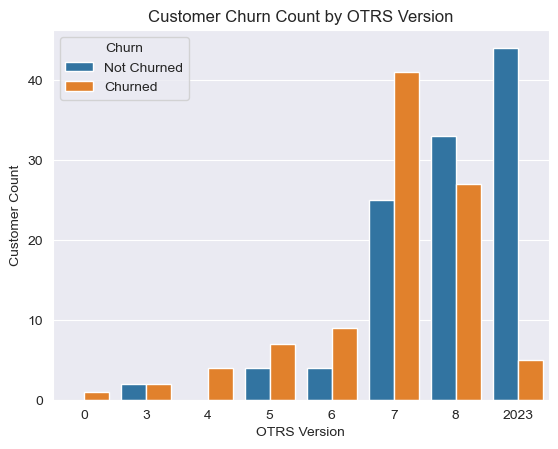

In [19]:
# count plot grouped by 'otrs_version' and churn status
# create a new df_version and group version numbers by major version and sort them in ascending order

df_version = pd.DataFrame({'otrs_version': df['otrs_version'], 'churn': df['churn']})
df_version['otrs_version'] = df_version['otrs_version'].str.split('.').str[0]
df_version['otrs_version'] = df_version['otrs_version'].astype('int')
df_version = df_version.sort_values(by=['otrs_version'], ascending=False)


# plt.figure(figsize=(16, 6))
sns.countplot(data=df_version, x='otrs_version', hue='churn')
plt.title('Customer Churn Count by OTRS Version')
plt.xlabel('OTRS Version')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

### Customer Country

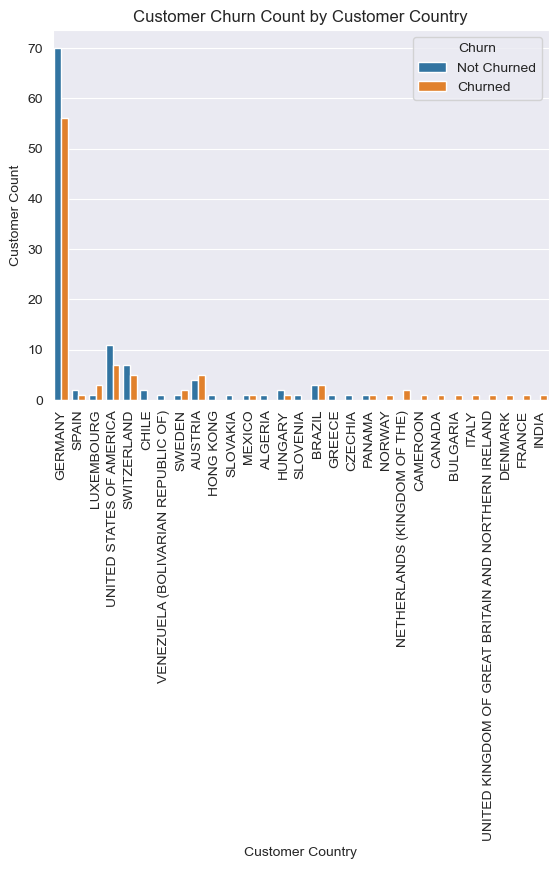

In [20]:
# count plot grouped by 'customer_country' and churn status
sns.countplot(data=df, x='customer_country', hue='churn')
plt.title('Customer Churn Count by Customer Country')
plt.xlabel('Customer Country')
plt.ylabel('Customer Count')
plt.xticks(rotation=90)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


### Repeat Customers

In [21]:
# get the number of different customers based on 'end_customer_id'
df_customer_count = df['end_customer_id'].value_counts().reset_index()
df_customer_count.columns = ['end_customer_id', 'customer_count']

# print the count of customers and number of contracts
# x customers have y contracts
print(f"Total number of customers: {df_customer_count.shape[0]}")
print(f"Number of contracts per customer:")
print(df_customer_count['customer_count'].value_counts())


Total number of customers: 175
Number of contracts per customer:
customer_count
1    145
2     28
4      1
3      1
Name: count, dtype: int64


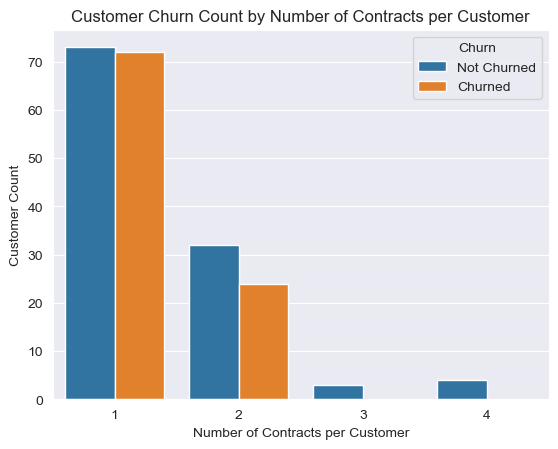

In [22]:
# count plot grouped by 'customer_count' and churn status
df_customer_churn = df_customer_count.merge(df[['end_customer_id', 'churn']], on='end_customer_id')
sns.countplot(data=df_customer_churn, x='customer_count', hue='churn')
plt.title('Customer Churn Count by Number of Contracts per Customer')
plt.xlabel('Number of Contracts per Customer')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()
